In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transaction-fraudulent-financial-syntheticdata/synthetic_financial_data.csv


# **Load Dataset**

In [16]:
data = pd.read_csv('/kaggle/input/transaction-fraudulent-financial-syntheticdata/synthetic_financial_data.csv')

In [17]:
data.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [18]:
data.shape

(10000, 11)

In [19]:
data.describe()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


# **Drop Data Column**

In [20]:
cols = ['transaction_time','card_type','location','purchase_category','transaction_description']

data = data.drop(cols, axis=1)

In [21]:
data.head()

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
0,1,1082,2027,5758.59,0,43
1,2,1015,2053,1901.56,1,61
2,3,1004,2035,1248.86,1,57
3,4,1095,2037,7619.05,1,59
4,5,1036,2083,1890.10,1,36


# **Finding NULL and Duplicate value**

In [22]:
data.isnull().sum()

transaction_id    0
customer_id       0
merchant_id       0
amount            0
is_fraudulent     0
customer_age      0
dtype: int64

In [23]:
data.duplicated().sum()

0

# **Correlation Matrix**

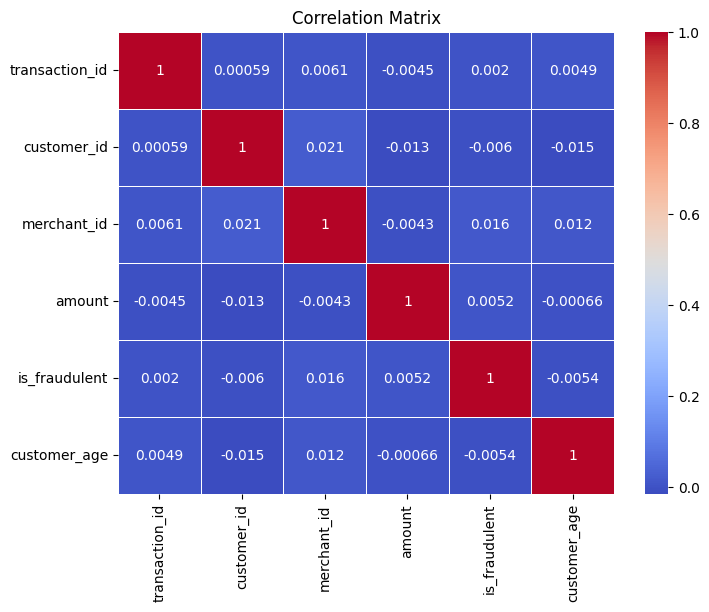

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

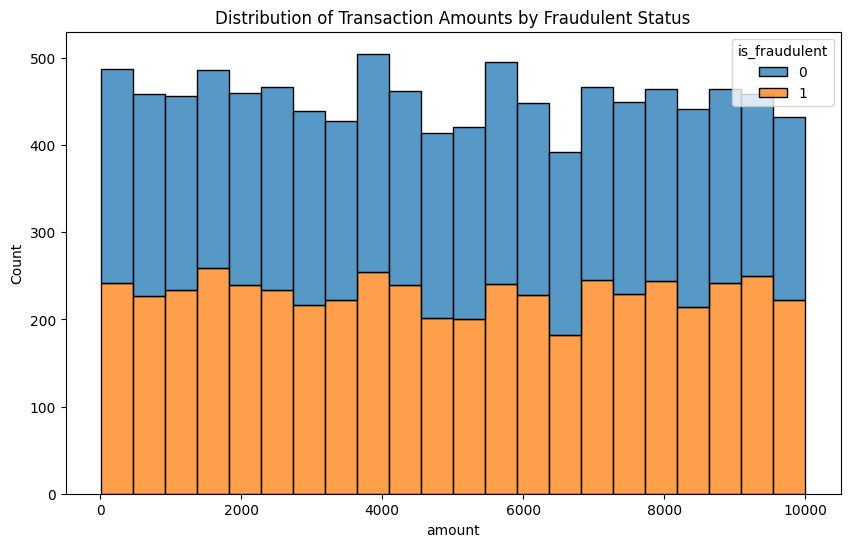

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data, x='amount', hue='is_fraudulent', multiple="stack")
plt.title('Distribution of Transaction Amounts by Fraudulent Status')
plt.show()

# **Assign X and y**

In [26]:
X = data.drop(['is_fraudulent'], axis=1)
y = data['is_fraudulent']

In [27]:
y.value_counts()

is_fraudulent
1    5068
0    4932
Name: count, dtype: int64

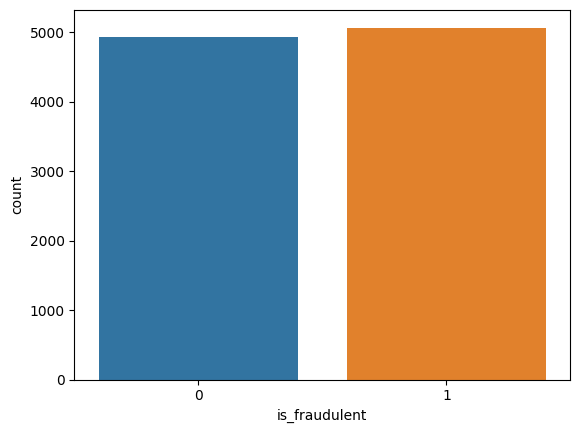

In [28]:
sns.countplot(data=data,x=y)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scalar Standardization**

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38       966
           1       0.52      0.71      0.60      1034

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.51      0.52      0.49      2000

Confusion Matrix:
 [[294 672]
 [297 737]]


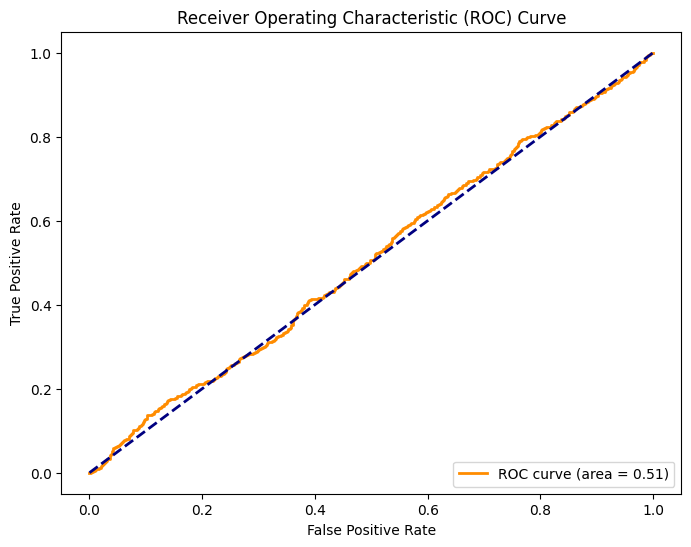

In [32]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Naive Bayes**

In [33]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.34      0.41       966
           1       0.52      0.68      0.59      1034

    accuracy                           0.52      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.52      0.50      2000

Confusion Matrix:
 [[332 634]
 [334 700]]


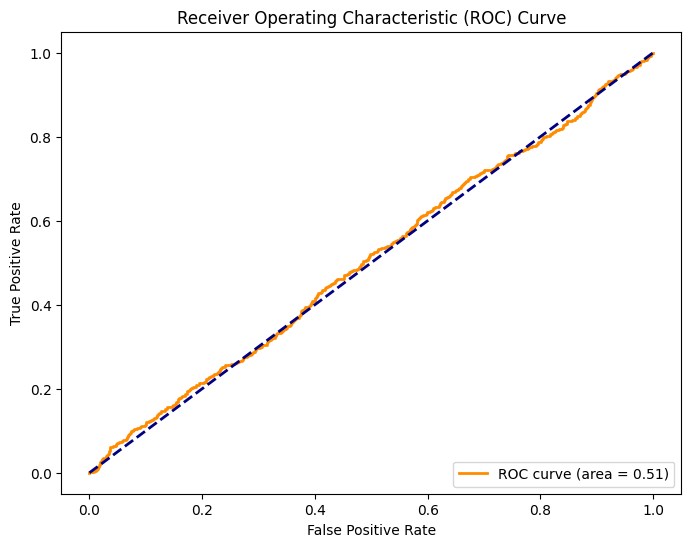

In [34]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.10      0.17       966
           1       0.51      0.88      0.65      1034

    accuracy                           0.51      2000
   macro avg       0.48      0.49      0.41      2000
weighted avg       0.49      0.51      0.42      2000


Confusion Matrix:
 [[101 865]
 [121 913]]


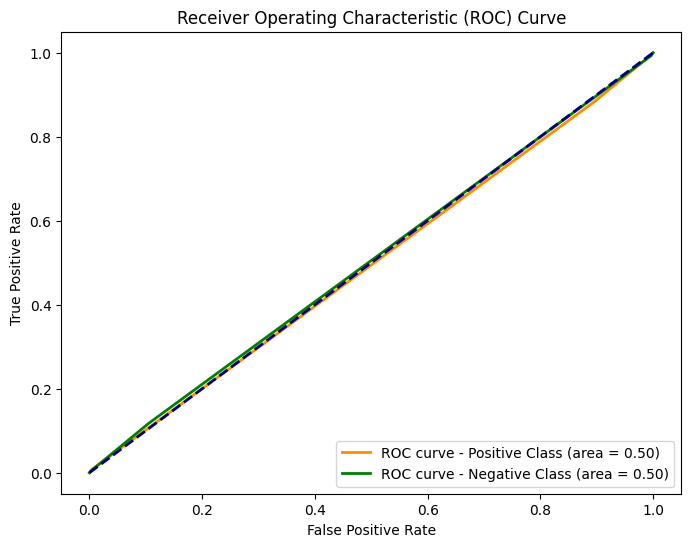

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50       966
           1       0.53      0.51      0.52      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000


Confusion Matrix:
 [[486 480]
 [503 531]]


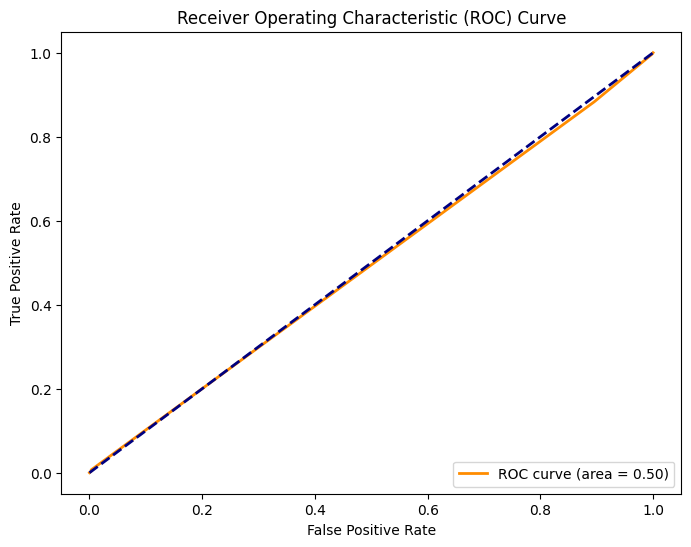

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **XGBOOST**

In [39]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       966
           1       0.52      0.53      0.53      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000


Confusion Matrix:
 [[467 499]
 [485 549]]


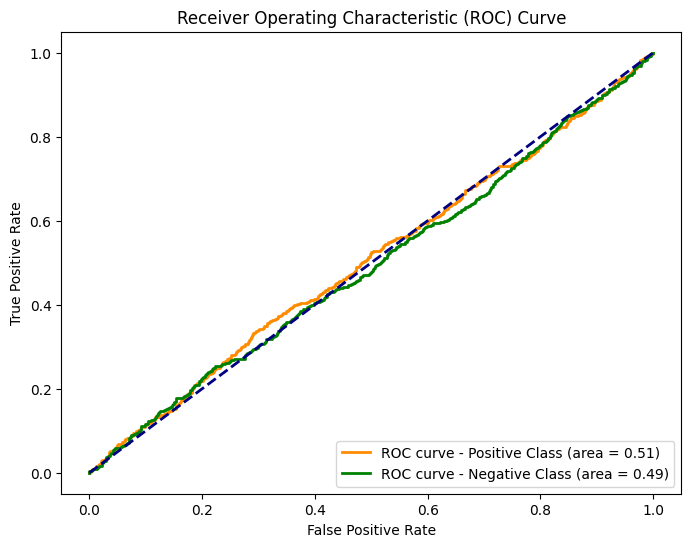

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Support Vector Machine**

In [41]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.48

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.40      0.43       966
           1       0.50      0.55      0.52      1034

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000


Confusion Matrix:
 [[389 577]
 [463 571]]


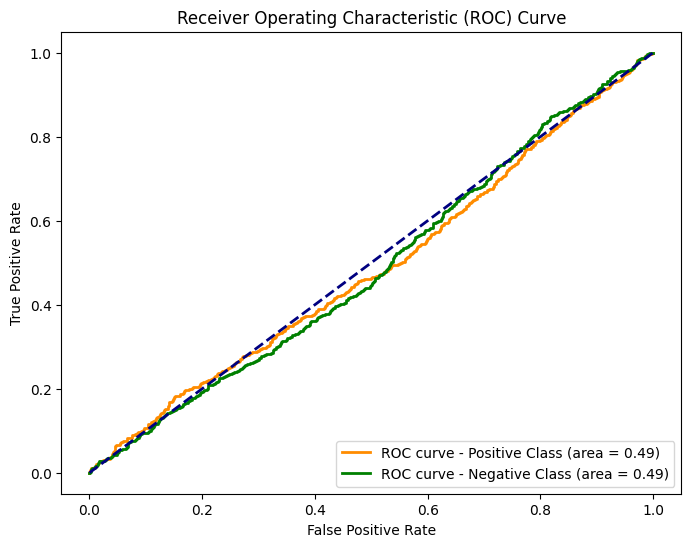

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute decision function
y_score = model.decision_function(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Invert the labels for the ROC curve of the negative class
y_test_negative = 1 - y_test  # Assuming the negative class is labeled as 0

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, _ = roc_curve(y_test_negative, -y_score)
roc_auc_neg = roc_auc_score(y_test_negative, -y_score)

# Plot ROC curves for both positive and negative classes
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Printing Accuracy from all Model**

Accuracy for Logistic Regression: 0.52
Accuracy for Gaussian Naive Bayes: 0.52
Accuracy for Decision Tree: 0.52
Accuracy for Random Forest: 0.50
Accuracy for Support Vector Machine: 0.48
Accuracy for XGBoost: 0.51


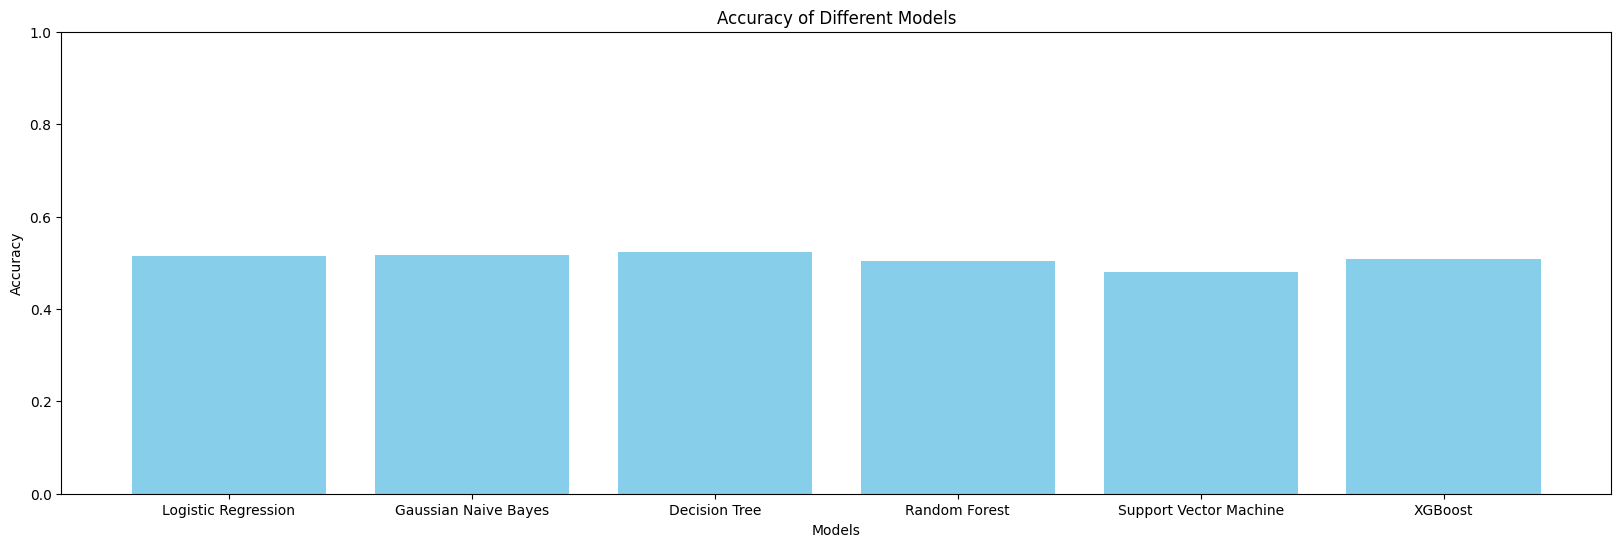

In [43]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' :  RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'XGBoost' : XGBClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

# Create a bar plot for the accuracies
plt.figure(figsize=(20, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])
plt.show()

# **Logistic Regression and Gaussian Naive Bayes got the highest Accuracy that is 52%**